## Comparing Loss Components for Dentate Gyrus: dHSIC model

In [ ]:

import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob, os
import matplotlib
import re

In [2]:
folders = os.listdir()
folders.sort(reverse=True)
print(folders)

['latent5_alpha50_hcv500', 'latent5_alpha50_hcv50', 'latent5_alpha50_hcv30', 'latent5_alpha50_hcv100', 'latent5_alpha20_hcv500', 'latent5_alpha20_hcv50', 'latent5_alpha20_hcv30', 'latent5_alpha20_hcv100', 'latent5_alpha1_hcv500', 'latent5_alpha1_hcv50', 'latent5_alpha1_hcv30', 'latent5_alpha1_hcv100', 'Dentate_Graphs_losses.ipynb', 'Dentate_Graphs_dis-score.ipynb', '.ipynb_checkpoints']


# Latent 5

In [9]:

z_dims = []
alphas = []
c_vals = []
kl_loss_last = []
recon_loss_last = []
vae_loss_last = []
hsic_last = []

for folder_name in folders:
    if "latent" in folder_name:
        z = re.search('latent(\d+)', folder_name)
        if int(z[1]) == 10:
            continue
        al = re.search('alpha(\d+)', folder_name)
        c = re.search('_hcv(\d+)', folder_name)
        z_dims.append(int(z[1]))
        alphas.append(int(al[1]))
        c_vals.append(int(c[1]))
        df = pd.read_csv(folder_name+"/csv_logger.log")
        kl_loss_last.append(round(df.loc[df.index[-1],"kl_loss"],2))
        recon_loss_last.append(round(df.loc[df.index[-1],"recon_loss"],2))
        vae_loss_last.append(round(df.loc[df.index[-1],"loss"],2))
        hsic_last.append(round(df.loc[df.index[-1],"HSIC"],5))

In [10]:
print(hsic_last)
print(alphas)
print(c_vals)

[0.00403, 0.00309, 0.00227, 0.00434, 0.01548, 0.00285, 0.00416, 0.00168, 0.17257, 0.04726, 0.11328, 0.02125]
[50, 50, 50, 50, 20, 20, 20, 20, 1, 1, 1, 1]
[500, 50, 30, 100, 500, 50, 30, 100, 500, 50, 30, 100]


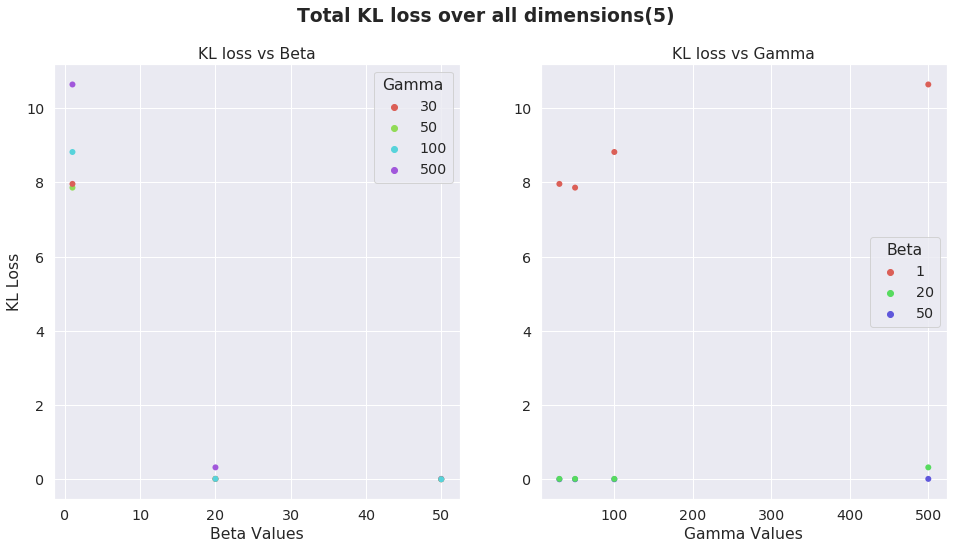

In [13]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(16,8))
scatter1 = sns.scatterplot(alphas,kl_loss_last,legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=4))
scatter2 = sns.scatterplot(c_vals,kl_loss_last,legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=3))

plt.suptitle("Total KL loss over all dimensions(5)", weight="bold")
scatter1.set_ylabel("KL Loss")
scatter1.set_xlabel("Beta Values")
scatter2.set_xlabel("Gamma Values")

scatter1.get_legend().set_title("Gamma")
scatter2.get_legend().set_title("Beta")
scatter1.set_title("KL loss vs Beta")
scatter2.set_title("KL loss vs Gamma")

plt.savefig("KL_loss_all_5.png",bbox_inches="tight")


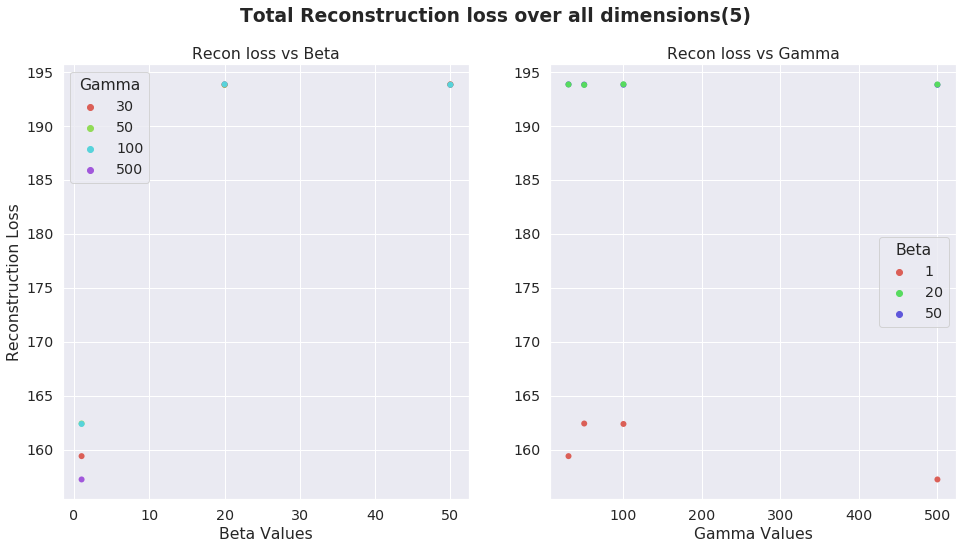

In [14]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(16,8))
scatter1 = sns.scatterplot(alphas,recon_loss_last,legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=4))
scatter2 = sns.scatterplot(c_vals,recon_loss_last,legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=3))

plt.suptitle("Total Reconstruction loss over all dimensions(5)", weight="bold")
scatter1.set_ylabel("Reconstruction Loss")
scatter1.set_xlabel("Beta Values")
scatter2.set_xlabel("Gamma Values")

scatter1.get_legend().set_title("Gamma")
scatter2.get_legend().set_title("Beta")
scatter1.set_title("Recon loss vs Beta")
scatter2.set_title("Recon loss vs Gamma")

plt.savefig("Recon_loss_all_5.png",bbox_inches="tight")


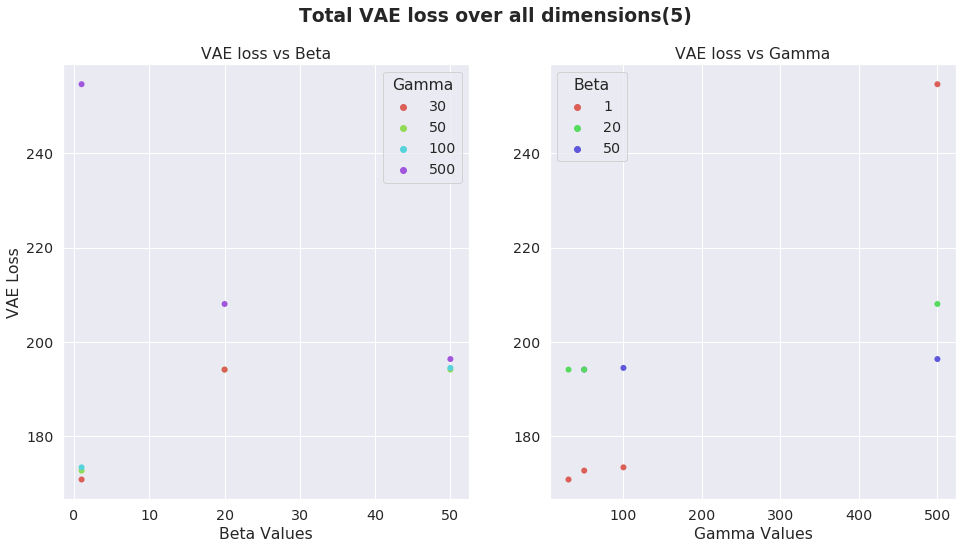

In [15]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(16,8))
scatter1 = sns.scatterplot(alphas,vae_loss_last,legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=4))
scatter2 = sns.scatterplot(c_vals,vae_loss_last,legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=3))

plt.suptitle("Total VAE loss over all dimensions(5)", weight="bold")
scatter1.set_ylabel("VAE Loss")
scatter1.set_xlabel("Beta Values")
scatter2.set_xlabel("Gamma Values")

scatter1.get_legend().set_title("Gamma")
scatter2.get_legend().set_title("Beta")
scatter1.set_title("VAE loss vs Beta")
scatter2.set_title("VAE loss vs Gamma")

plt.savefig("Vae_loss_all_5.png",bbox_inches="tight")


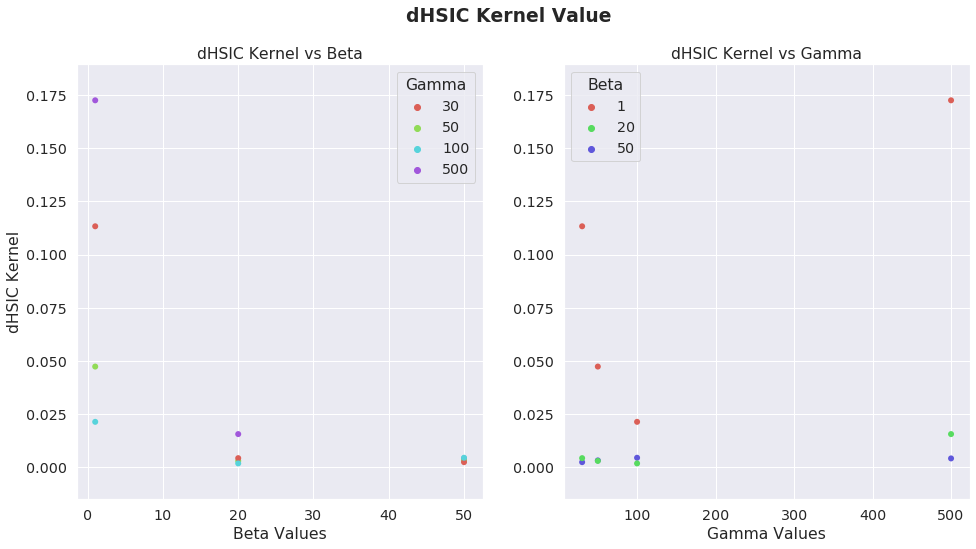

In [16]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(16,8))
scatter1 = sns.scatterplot(alphas,hsic_last,legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=4))
scatter2 = sns.scatterplot(c_vals,hsic_last,legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=3))

plt.suptitle("dHSIC Kernel Value", weight="bold")
scatter1.set_ylabel("dHSIC Kernel")
scatter1.set_xlabel("Beta Values")
scatter2.set_xlabel("Gamma Values")

scatter1.get_legend().set_title("Gamma")
scatter2.get_legend().set_title("Beta")
scatter1.set_title("dHSIC Kernel vs Beta")
scatter2.set_title("dHSIC Kernel vs Gamma")

plt.savefig("dhsic_all_5.png",bbox_inches="tight")
